In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [16]:
df.rename(columns={
    'thalch': 'max_heart_rate',      
    'cp': 'chest_pain',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'exang': 'exercise_angina',
    'num': 'target'
}, inplace=True)
df.head()

,id,age,sex,dataset,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   920 non-null    int64  
 1   age                  920 non-null    int64  
 2   sex                  920 non-null    object 
 3   dataset              920 non-null    object 
 4   chest_pain           920 non-null    object 
 5   resting_bp           920 non-null    float64
 6   cholesterol          920 non-null    float64
 7   fasting_blood_sugar  920 non-null    object 
 8   restecg              920 non-null    object 
 9   max_heart_rate       920 non-null    float64
 10  exercise_angina      920 non-null    object 
 11  oldpeak              920 non-null    float64
 12  slope                920 non-null    object 
 13  ca                   920 non-null    float64
 14  thal                 920 non-null    object 
 15  target               920 non-null    int

In [18]:
df.describe()

,id,age,resting_bp,cholesterol,max_heart_rate,oldpeak,ca,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.833370,0.227174,0.995652
std,265.725422,9.424685,18.443895,108.957634,25.138494,1.056348,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,221.000000,138.000000,0.200000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [19]:
df.isnull().sum()

id                     0
age                    0
sex                    0
dataset                0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
dtype: int64

In [22]:
#Handling missinbg values

df['resting_bp'].fillna(df['resting_bp'].mean(),inplace=True)
df['cholesterol'].fillna(df['cholesterol'].mean(),inplace=True)
df['max_heart_rate'].fillna(df['max_heart_rate'].mean(),inplace=True)
df['ca'].fillna(df['ca'].mean(), inplace=True)

df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)
df.loc[df['oldpeak'] < 0, 'oldpeak'] = 0

df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

# Select categorical columns (object or category type)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
# Fill NaNs with 'Unknown'
df[cat_cols] = df[cat_cols].fillna('Unknown')


C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\1192098666.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resting_bp'].fillna(df['resting_bp'].mean(),inplace=True)
C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\1192098666.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [23]:
# After handling missing values
df.isnull().sum()

id                     0
age                    0
sex                    0
dataset                0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
restecg                0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
dtype: int64

In [24]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({
    'True': 1,
    'False': 0,
    'Unknown':1
})
df['exercise_angina'] = df['exercise_angina'].replace({
    'True': 1,
    'False':0,
    'Unknown':1
})

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


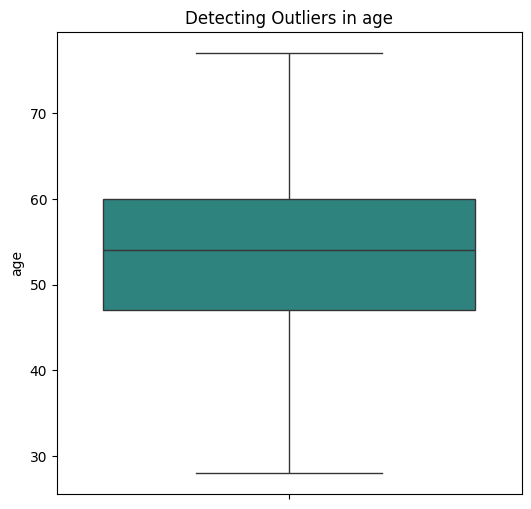

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


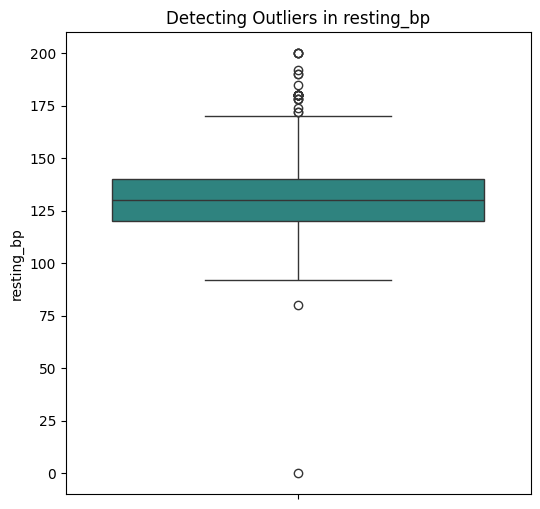

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


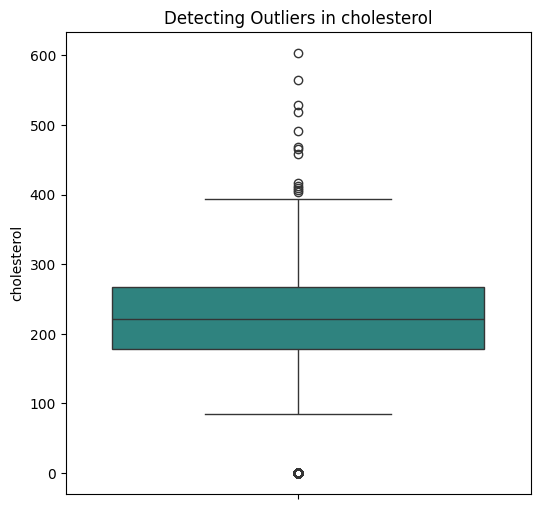

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


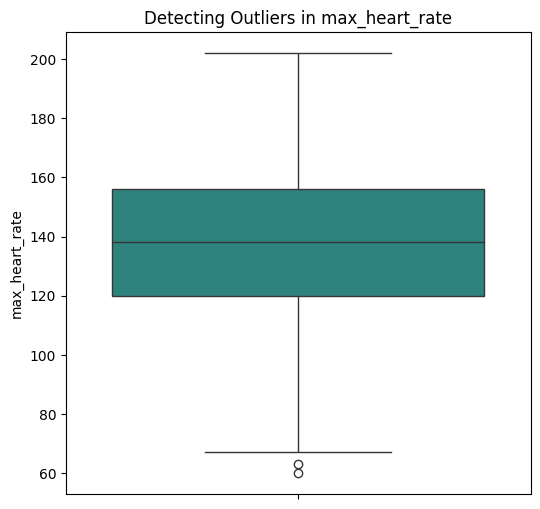

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


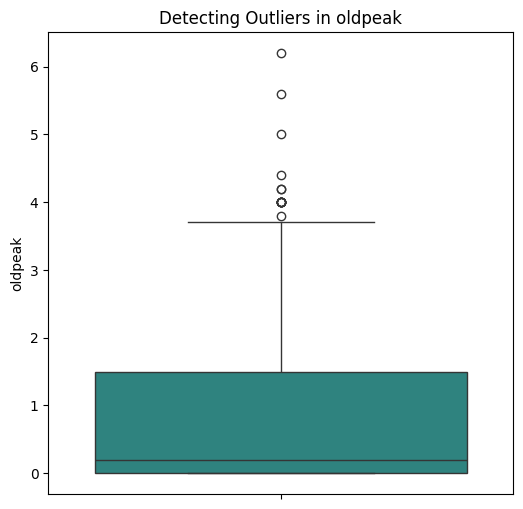

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


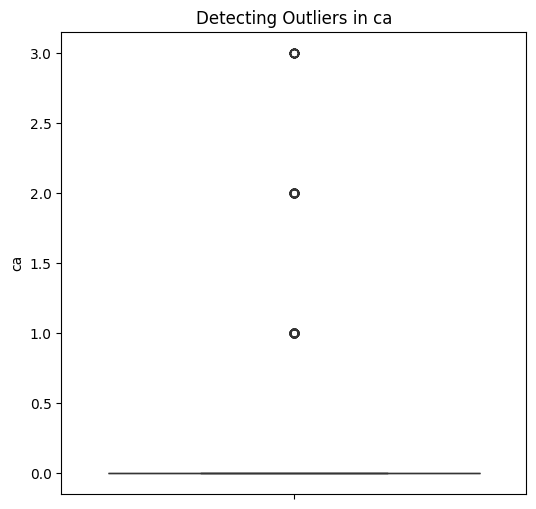

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


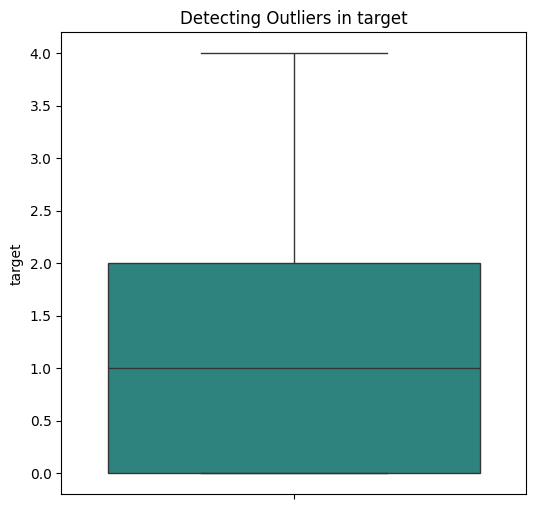

In [27]:
num_cols = ['age','resting_bp','cholesterol','max_heart_rate','oldpeak','ca','target']
for i in num_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[i] , palette='viridis')
    plt.title(f"Detecting Outliers in {i}")
    plt.show()

In [28]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


out_cols = ['resting_bp', 'cholesterol','oldpeak']

for col in out_cols:
    df = cap_outliers_iqr(df, col)

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


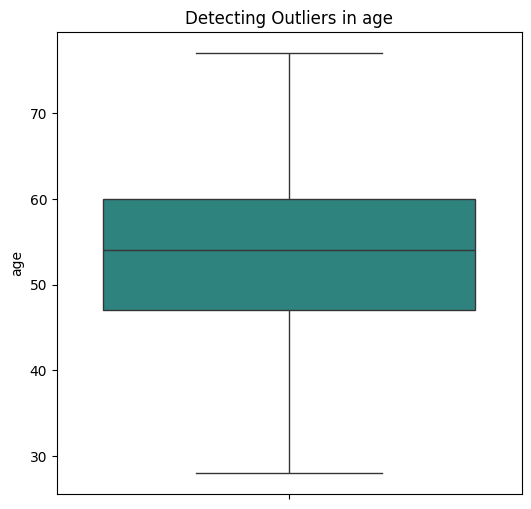

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


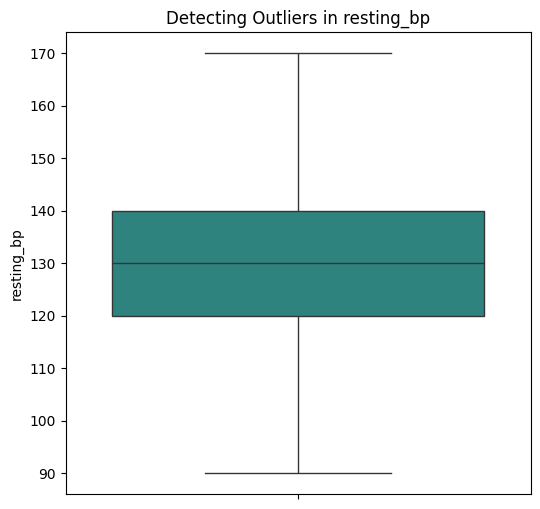

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


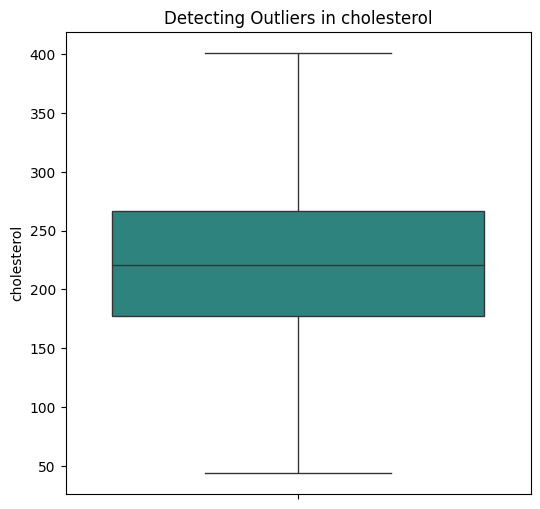

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


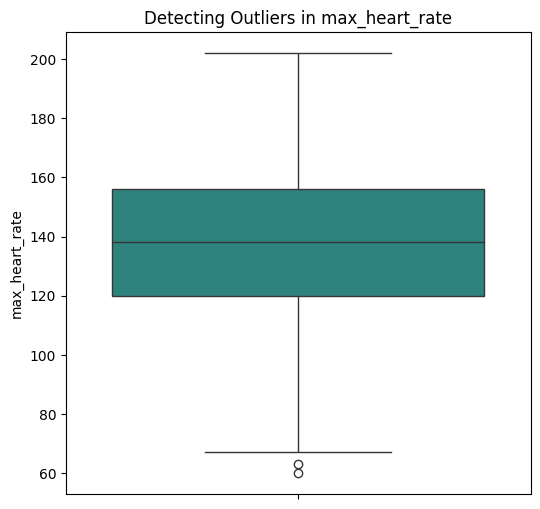

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


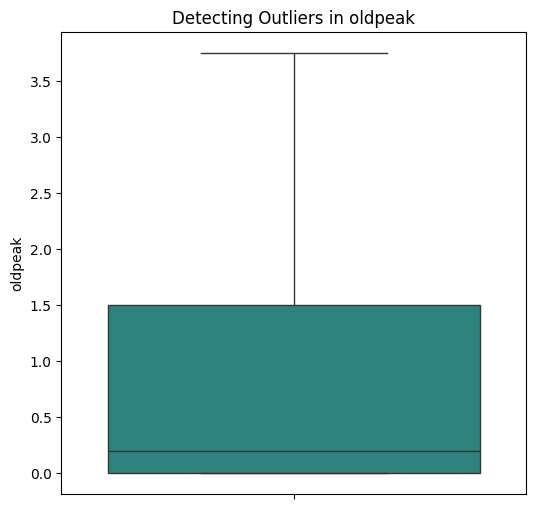

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


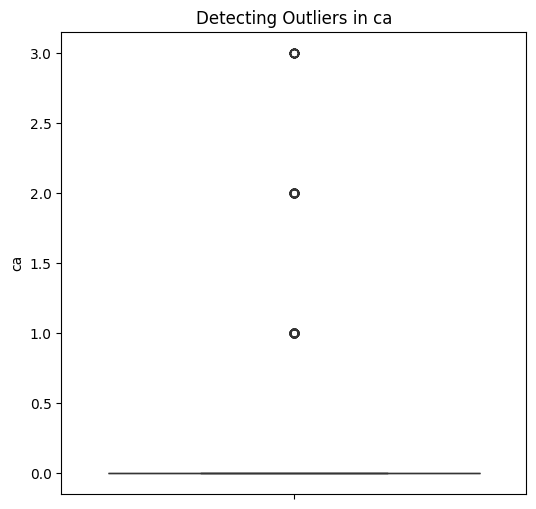

C:\Users\ranja\AppData\Local\Temp\ipykernel_9056\2811104549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='viridis')


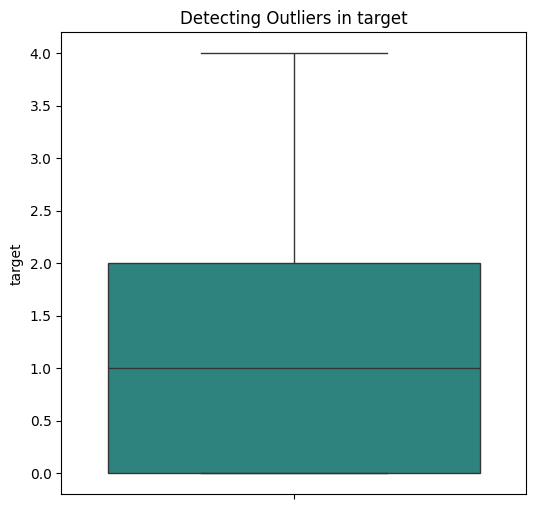

In [30]:
num_cols = ['age','resting_bp','cholesterol','max_heart_rate','oldpeak','ca','target']
for i in num_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[i] , palette='viridis')
    plt.title(f"Detecting Outliers in {i}")
    plt.show()

In [35]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

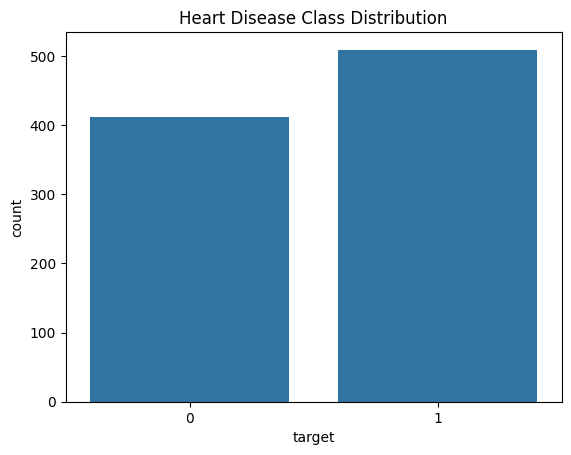

In [36]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

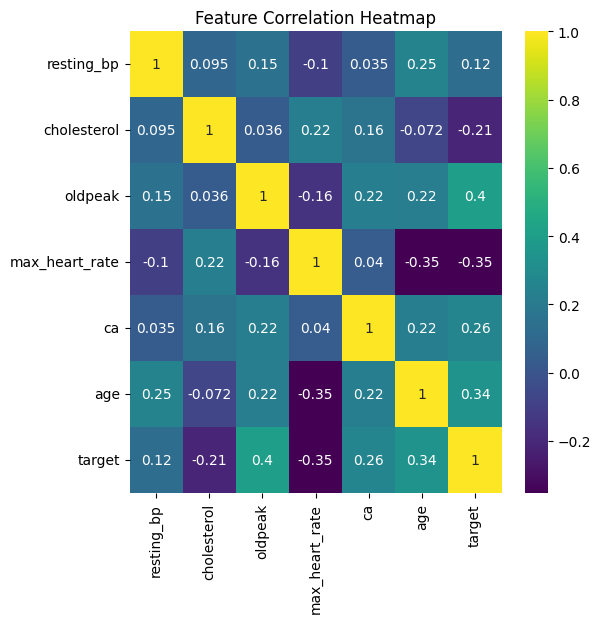

In [32]:
corr_matrix = df[['resting_bp', 'cholesterol', 'oldpeak', 'max_heart_rate', 'ca', 'age','target']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = df.select_dtypes(include=['object', 'category']).columns

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = ohe.fit_transform(df[cat_cols])

encoded_cols = ohe.get_feature_names_out(cat_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

df = df.drop(columns=cat_cols).reset_index(drop=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.head()


,id,age,resting_bp,cholesterol,max_heart_rate,oldpeak,ca,target,sex_Female,sex_Male,...,exercise_angina_False,exercise_angina_True,slope_Unknown,slope_downsloping,slope_flat,slope_upsloping,thal_Unknown,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,67,160.0,286.0,108.0,1.5,3.0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,67,120.0,229.0,129.0,2.6,2.0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,37,130.0,250.0,187.0,3.5,0.0,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,41,130.0,204.0,172.0,1.4,0.0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [47]:
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [48]:
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8586956521739131


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train, y_train)
best_model_rs = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
y_pred_rs = best_model_rs.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rs))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Accuracy: 0.8586956521739131
